In [1]:
# Installations
!pip install -q google-generativeai
!brew install poppler
!pip install pandas
!pip install pdf2image
!pip install matplotlib


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
==> Auto-updating Homebrew...
Adjust how often this is run with HOMEBREW_AUTO_UPDATE_SECS or disable with
HOMEBREW_NO_AUTO_UPDATE. Hide these hints with HOMEBREW_NO_ENV_HINTS (see `man brew`).
==> Auto-updated Homebrew!
Updated 3 taps (homebrew/services, homebrew/core and homebrew/cask).
==> New Formulae
cargo-run-bin   glibc@2.17      kraftkit        scooter         topiary
draft           ipatool         regal           sesh
==> New Casks
font-cica-without-emoji                  tabtab

You have 27 outdated formulae and 2 outdated casks installed.

To reinstall 24.11.0, run:
  brew reinstall poppler

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.3.

In [2]:
import google.generativeai as genai
from google.generativeai import caching
from pdf2image import convert_from_path
import tempfile
import datetime
import time
import pandas as pd
import typing_extensions as typing
from typing import Literal

In [3]:
# Defining structured output
class InformationSegment(typing.TypedDict):
    contributing_information: str
    contributing_information_type: Literal["text", "diagram", "table"]

class Page(typing.TypedDict):
    manual_page_num: str
    information_segements: list[InformationSegment]
    
class Response(typing.TypedDict):
    relevant_pages: list[Page]
    query_answer: str    

In [4]:
import os
# Fetch the GOOGLE_API_KEY from environment variables
google_api_key = os.getenv('GOOGLE_API_KEY')

genai.configure(api_key=api_key)

NameError: name 'UserSecretsClient' is not defined

In [6]:
pdf_path = './manual_130.pdf'
pages = convert_from_path(pdf_path)
print(pages)

[<PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1704x2200 at 0x130245510>, <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1701x2200 at 0x130244110>, <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1701x2200 at 0x130245590>, <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1701x2200 at 0x130244810>, <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2187 at 0x1302448D0>, <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1701x2187 at 0x1302456D0>, <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2187 at 0x130244850>, <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2187 at 0x130244710>, <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2187 at 0x130244790>, <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2187 at 0x1302446D0>, <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1701x2187 at 0x130244890>, <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1701x2187 at 0x130244750>, <PIL.PpmImagePlugin.PpmImageFile image 

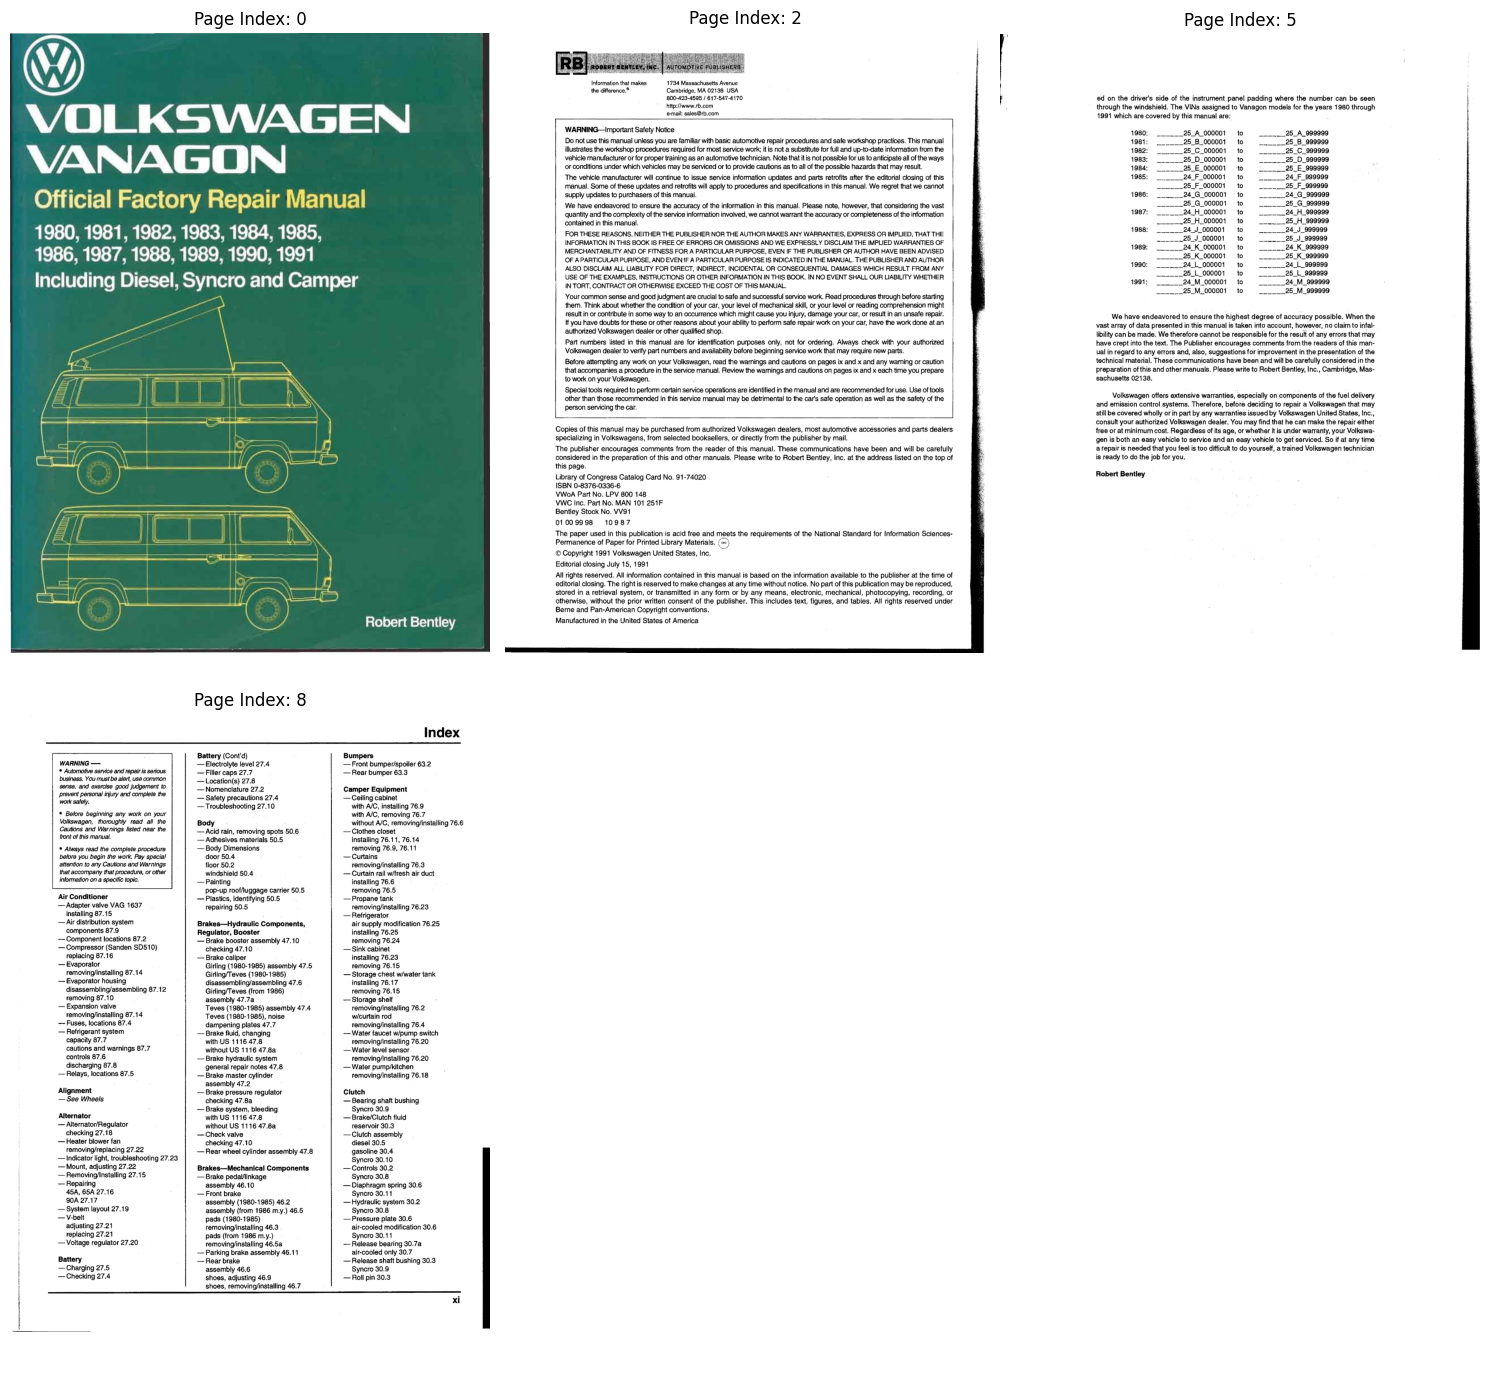

In [11]:
from IPython.display import display
import matplotlib.pyplot as plt
import math

def display_selected_pages(pages, indexes, columns=2):
    """
    Displays specific pages based on their indexes, arranged in a grid with a configurable number of columns.
    
    Args:
        pages (list): List of PIL.Image objects representing the pages of a PDF.
        indexes (list): List of integers representing the indexes of pages to display.
        columns (int): Number of columns per row (default is 2).
    """
    # Validate columns
    if columns < 1:
        raise ValueError("The number of columns must be at least 1.")
    
    # Filter valid indexes
    valid_indexes = [index for index in indexes if 0 <= index < len(pages)]
    if len(valid_indexes) < len(indexes):
        print(f"Some indexes are invalid and have been skipped: {set(indexes) - set(valid_indexes)}")
    
    # Calculate rows needed
    rows = math.ceil(len(valid_indexes) / columns)
    
    # Create a grid to display pages
    fig, axes = plt.subplots(rows, columns, figsize=(columns * 5, rows * 7))
    axes = axes.flatten()  # Flatten in case of multi-dimensional axes
    
    # Iterate over valid indexes and plot
    for i, index in enumerate(valid_indexes):
        axes[i].imshow(pages[index])  # Render the page in color
        axes[i].axis('off')  # Remove axes for cleaner display
        axes[i].set_title(f"Page Index: {index}")  # Set title as page index
    
    # Hide unused subplots
    for j in range(len(valid_indexes), len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()

# Example usage
indexes_to_display = [0, 2, 5, 8]  # Replace with desired indexes
display_selected_pages(pages, indexes_to_display, columns=3)


In [7]:
print(pages)

[<PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1704x2200 at 0x130245510>, <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1701x2200 at 0x130244110>, <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1701x2200 at 0x130245590>, <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1701x2200 at 0x130244810>, <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2187 at 0x1302448D0>, <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1701x2187 at 0x1302456D0>, <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2187 at 0x130244850>, <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2187 at 0x130244710>, <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2187 at 0x130244790>, <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2187 at 0x1302446D0>, <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1701x2187 at 0x130244890>, <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1701x2187 at 0x130244750>, <PIL.PpmImagePlugin.PpmImageFile image 